### `links.csv`, `movies.csv`, `ratings.csv`and `tags.csv`.

# Internship Entrance Test

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
links_df = pd.read_csv("Datasets\Hackathon\links.csv")
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
links_df.shape

(9742, 3)

In [17]:
movie_df = pd.read_csv("Datasets\Hackathon\movies.csv")
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## What is the shape of "movies.csv"?

In [23]:
movie_df.shape

(9742, 3)

In [20]:
rating_df = pd.read_csv("Datasets\\Hackathon\\ratings.csv")
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## What is the shape of "ratings.csv"?

In [25]:
rating_df.shape

(100836, 4)

## How many unique "userId" are available in "ratings.csv"?

In [27]:
rating_df["userId"].nunique()

610

In [22]:
tags_df = pd.read_csv("Datasets\\Hackathon\\tags.csv")
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Which movie has recieved maximum number of user ratings?

In [28]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [29]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [30]:
movie_rat = pd.merge(movie_df,rating_df,on=["movieId"])
movie_rat

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [51]:
grp = movie_rat.groupby("title")["rating"].count().idxmax()
grp

'Forrest Gump (1994)'

## Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [75]:
tags_mov_rat = pd.merge(movie_rat,tags_df,on=["movieId"])
tags_mov_rat

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [180]:
tags = tags_mov_rat.loc[tags_mov_rat["title"]=="Matrix, The (1999)",['tag']]
tags["tag"].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [83]:
movie = movie_rat[movie_rat["title"]=="Terminator 2: Judgment Day (1991)"]
movie["rating"].mean()

3.970982142857143

## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<Axes: xlabel='rating', ylabel='Density'>

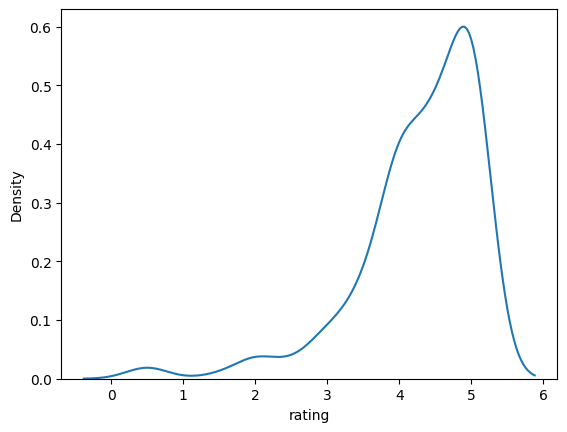

In [85]:
data = movie_rat[movie_rat["title"]=='Fight Club (1999)']
sns.kdeplot(data["rating"])

In [181]:
movie_stats = movie_rat.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
movie_stats.columns = ['movieId', 'num_ratings', 'avg_rating']
merged_df = pd.merge(movie_stats, movie_df, on='movieId', how='inner')
final_movie = merged_df[merged_df['num_ratings'] > 50]
final_movie

,movieId,num_ratings,avg_rating,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
5,6,102,3.946078,Heat (1995),Action|Crime|Thriller
6,7,54,3.185185,Sabrina (1995),Comedy|Romance
...,...,...,...,...,...
8287,106782,54,3.916667,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
8354,109374,52,3.778846,"Grand Budapest Hotel, The (2014)",Comedy|Drama
8358,109487,73,3.993151,Interstellar (2014),Sci-Fi|IMAX
8457,112852,59,4.050847,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


## Which movie is the most popular based on  average user ratings?

In [182]:
avg_max = final_movie["avg_rating"].max()
final_movie.loc[final_movie["avg_rating"]==avg_max,["title"]]

,title
277,"Shawshank Redemption, The (1994)"


## Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [183]:
top5_popular_movies = final_movie.sort_values(by='num_ratings', ascending=False)
top5_popular_movies

,movieId,num_ratings,avg_rating,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
...,...,...,...,...,...
3147,4239,51,3.813725,Blow (2001),Crime|Drama
3490,4776,51,3.794118,Training Day (2001),Crime|Drama|Thriller
3539,4848,51,3.843137,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller
118,145,51,3.245098,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller


In [186]:
movie_sci = final_movie[final_movie['genres'].str.contains('Sci-Fi')]
final_sci = movie_sci.sort_values(by='num_ratings', ascending=False)
final_sci.iloc[2]

movieId                                     480
num_ratings                                 238
avg_rating                                 3.75
title                      Jurassic Park (1993)
genres         Action|Adventure|Sci-Fi|Thriller
Name: 418, dtype: object

## Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [147]:
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [167]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan
imdb_id = "8391976"  
rating = scrapper(imdb_id)
print(f"IMDb Rating for tt{imdb_id}: {rating}")

IMDb Rating for tt8391976: 7.3


In [187]:
movie_rat_link = pd.merge(final_movie,links_df,on=["movieId"])
movie_rat_link

,movieId,num_ratings,avg_rating,title,genres,imdbId,tmdbId
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,6,102,3.946078,Heat (1995),Action|Crime|Thriller,113277,949.0
4,7,54,3.185185,Sabrina (1995),Comedy|Romance,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,54,3.916667,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,993846,106646.0
432,109374,52,3.778846,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2278388,120467.0
433,109487,73,3.993151,Interstellar (2014),Sci-Fi|IMAX,816692,157336.0
434,112852,59,4.050847,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2015381,118340.0


In [172]:
import requests
import numpy as np
from bs4 import BeautifulSoup
print("Progess: ")
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:119.0) Gecko/20100101 Firefox/119.0'
    }
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        imdb_rating = soup.find('span', attrs={'class': 'sc-bde20123-1 cMEQkK'})
        print(".",end='')
        return imdb_rating.text.strip() if imdb_rating else np.nan
    except requests.exceptions.RequestException as e:
        print(f"Error fetching IMDb rating for {URL}: {e}")
        return np.nan
movie_rat_link['imdb_rating'] = movie_rat_link['imdbId'].apply(scrapper)
print(movie_rat_link[['imdbId', 'imdb_rating']])

Progess: 
....................................................................................................................................................................................................................................................................................................................................................................................................................................................      imdbId imdb_rating
0     114709         8.3
1     113497         7.1
2     113228         6.6
3     113277         8.3
4     114319         6.3
..       ...         ...
431   993846         8.2
432  2278388         8.1
433   816692         8.7
434  2015381         8.0
435  1431045         8.0

[436 rows x 2 columns]


## Mention the movieId of the movie which has the highest IMDB rating.

In [175]:
movie_rat_link

,movieId,num_ratings,avg_rating,title,genres,imdbId,tmdbId,imdb_rating
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,8.3
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,7.1
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,6.6
3,6,102,3.946078,Heat (1995),Action|Crime|Thriller,113277,949.0,8.3
4,7,54,3.185185,Sabrina (1995),Comedy|Romance,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,54,3.916667,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,993846,106646.0,8.2
432,109374,52,3.778846,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2278388,120467.0,8.1
433,109487,73,3.993151,Interstellar (2014),Sci-Fi|IMAX,816692,157336.0,8.7
434,112852,59,4.050847,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2015381,118340.0,8.0


In [173]:
im_max = movie_rat_link["imdb_rating"].max()
movie_rat_link.loc[movie_rat_link["imdb_rating"]==im_max,["movieId"]]

,movieId
53,318


## Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [174]:
sci_fi_movies = movie_rat_link[movie_rat_link['genres'].str.contains('Sci-Fi')]
max = sci_fi_movies["imdb_rating"].max()
sci_fi_movies.loc[sci_fi_movies["imdb_rating"]==max,["movieId"]]

,movieId
424,79132
